1. Loading the dataset

In [1]:
# 1.1. Launch commands to automatically reload modules
%load_ext autoreload
%autoreload 2

In [2]:
# 1.2. Import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 1.3. Load the training, target and test dataset into a dataframes called df_train, df_test and df_target
# Load the Parquet files into DataFrames
df_train = pd.read_parquet('../data/interim/train_cleaned.parquet')
df_target = pd.read_parquet('../data/interim/target.parquet')

In [4]:
df_train.shape

(46618, 31)

In [5]:
df_target.shape

(46618, 1)

2. Spliting the training data into train and validation datasets

In [6]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [7]:
#Split the features and target variable into 2 different sets (training and validation) with 80-20 ratio
X_train, X_val, y_train, y_val = train_test_split(df_train, df_target, test_size=0.2, random_state=42)

In [8]:
X_train.shape

(37294, 31)

In [9]:
X_val.shape

(9324, 31)

In [10]:
y_train.shape

(37294, 1)

In [11]:
y_val.shape

(9324, 1)

3. Access Baseline Model

In [12]:
# 3.1 Find the mode of the target variable and save it into a variable called y_mode
y_mode = y_train.mode()

# 3.2 Create a numpy array called y_base filled with this value of same length of y_train
y_base = np.full(y_train.shape, y_mode)

In [13]:
# Unit Tests
assert isinstance(y_base, np.ndarray)
assert y_base.shape == y_train.shape

In [14]:
# 3.3 To plot ROC curve and the AUC metric
from sklearn import metrics

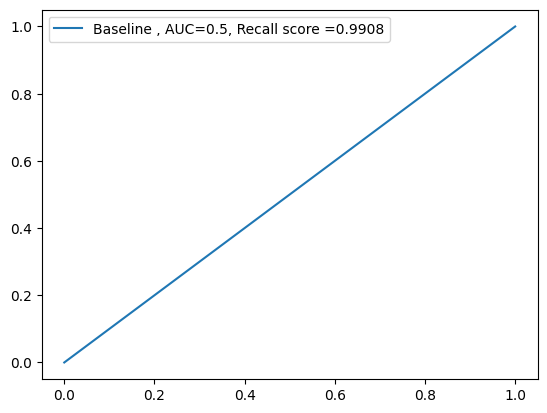

In [15]:
plt.figure(0). clear() 
fpr, tpr, _ = metrics.roc_curve(y_train, y_base)
auc = round(metrics.roc_auc_score(y_train, y_base), 4)
recall = round(metrics.recall_score(y_train, y_base, average='weighted'),4)
plt.plot(fpr,tpr,label="Baseline , AUC="+str(auc)+", Recall score ="+str(recall))

#add legend
plt.legend()

In [16]:
# 3.4 Saving the interim processed data
# Paths for parquet files
path1 = '../data/processed/X_train.parquet'
path2 = '../data/processed/X_val.parquet'
path3 = '../data/processed/y_train.parquet'
path4 = '../data/processed/y_val.parquet'

# Training data
X_train.to_parquet(path1, index=False, engine='pyarrow')
y_train.to_parquet(path3, index=False, engine='pyarrow')


# Validation data
X_val.to_parquet(path2, index=False, engine='pyarrow')
y_val.to_parquet(path4, index=False, engine='pyarrow')



4. SMOTE

In [17]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# For multiclass classification, compute the number of samples in each class
# Sum across rows to get the distribution for each class
def class_distribution(y):
    return np.sum(y, axis=0)
    
# Check the number of samples in each class after resampling
print("Before SMOTE:")
print("Class distribution in training data:", class_distribution(y_train))

print("After SMOTE:")
print("Class distribution in resampled training data:", class_distribution(y_train_resampled))

Before SMOTE:
Class distribution in training data: drafted    342.0
dtype: float64
After SMOTE:
Class distribution in resampled training data: drafted    36952.0
dtype: float64


In [18]:
# 4.1 Saving the interim processed data
# Paths for parquet files
path1 = '../data/processed/X_train_resampled.parquet'
path3 = '../data/processed/y_train_resampled.parquet'


# Training data - SMOTE resampled
X_train.to_parquet(path1, index=False, engine='pyarrow')
y_train.to_parquet(path3, index=False, engine='pyarrow')